# Dispersion en una distribucion

1. Rango: El Rango es el intervalo entre el valor máximo y el valor mínimo.

2. Cuartiles: Los cuartiles son valores que dividen una muestra de datos en cuatro partes iguales.

- 1er cuartil (Q1): 25% de los datos es menor que o igual a este valor.

- 2do cuartil (Q2): La mediana. 50% de los datos es menor que o igual a este valor.

- 3er cuartil (Q3): 75% de los datos es menor que o igual a este valor.

3. Rango intercuartil: La distancia entre el primer 1er cuartil y el 3er cuartil (Q3-Q1); de esta manera, abarca el 50% central de los datos.

4. Desviacion estandar

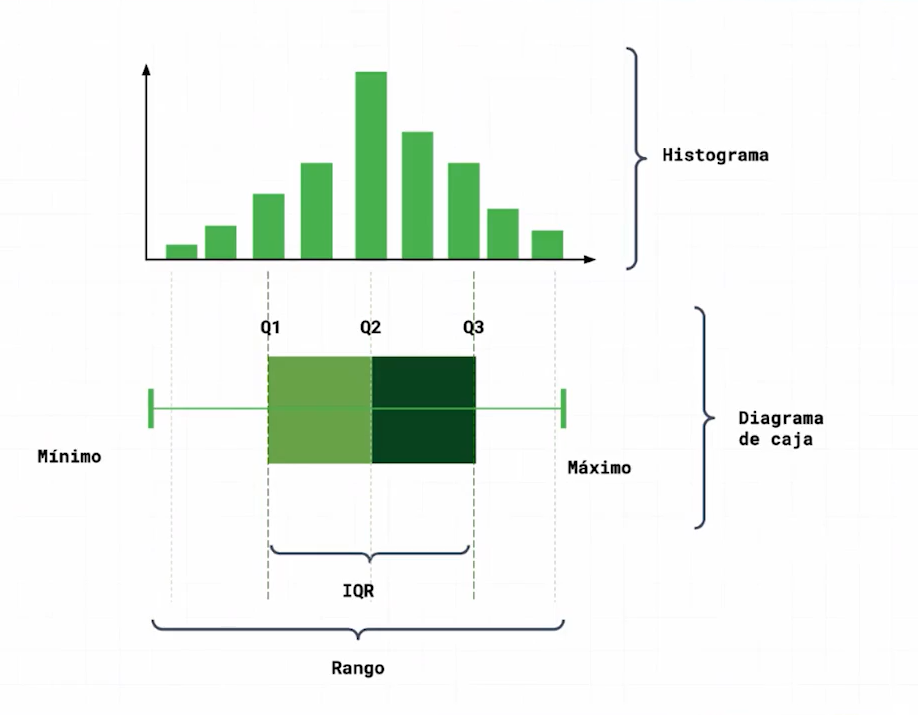

In [1]:
from IPython.display import Image
Image("/work/image-20230222-230428.png")

# Medidas de dispersión

continuamos con el dataset https://www.kaggle.com/lepchenkov/usedcarscatalog

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cars.csv')

In [3]:
# Desviación estandar
df['price_usd'].std()

6428.1520182029035

In [4]:
# Rango = valor max - valor min
rango = df['price_usd'].max() - df['price_usd'].min()
rango

49999.0

In [5]:
# Quartiles
median = df['price_usd'].median()
Q1 = df['price_usd'].quantile(q=0.25)
Q3 = df['price_usd'].quantile(q=0.75)
min_val = df['price_usd'].quantile(q=0)
max_val = df['price_usd'].quantile(q=1.0)
print(f'min: {min_val}  q1:{Q1} median: {median}  q3:{Q3}  max:{max_val}')

min: 1.0  q1:2100.0 median: 4800.0  q3:8990.0  max:50000.0


In [6]:
# rango intercualtil
iqr = Q3 - Q1
iqr

6890.0

### Límites para detección de outliers (datos simetricamente distribuidos)

Datos entre $$Q_1 -1.5 \times \text{IQR}$$ y $$Q_3 + 1.5 \times \text{IQR}$$

In [7]:
minlimit = Q1 - 1.5*iqr
maxlimit = Q3 + 1.5*iqr
print('rango para detección de outliers: {}, {}'.format(minlimit, maxlimit))

rango para detección de outliers: -8235.0, 19325.0


[Text(0.5, 0, '')]

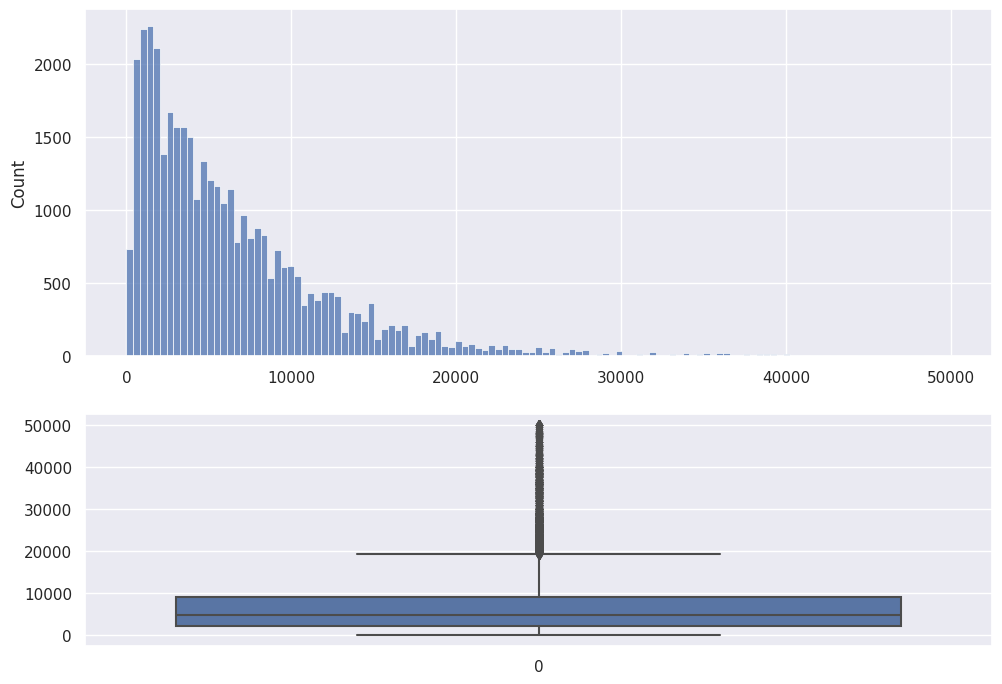

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, (ax_hist, ax_box) = plt.subplots(2, sharex=False, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(df['price_usd'], ax=ax_hist)
sns.boxplot(df['price_usd'], ax=ax_box)
ax_hist.set(xlabel='')

Es posible calcular varios box-plot separando por una cierta variable categórica:

<AxesSubplot:xlabel='engine_fuel', ylabel='price_usd'>

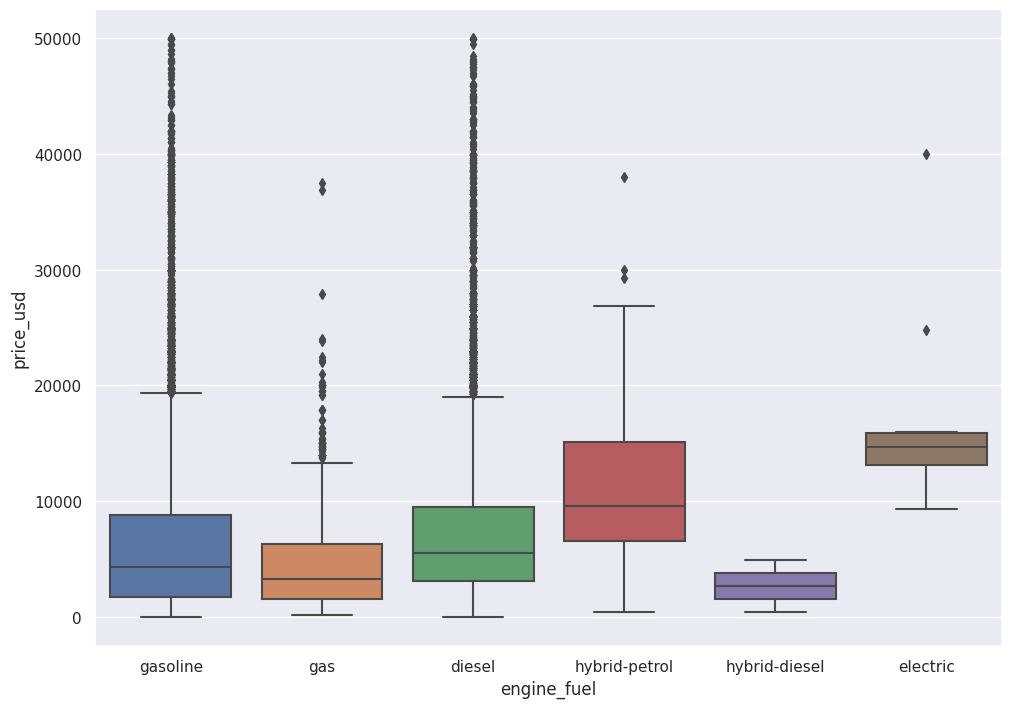

In [18]:
sns.boxplot(x = 'engine_fuel', y = 'price_usd', data = df)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=86e57948-5826-4e82-b8a9-8d73035014be' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>